# Visualizing streamlines
https://www.numbercrunch.de/blog/2013/05/visualizing-streamlines/#codesyntax_1

In Visualizing vector fields I showed how to plot vector fields using Python and Matplotlib. Streamlines are a concept that is closely related to vector fields. Mathematically speaking streamlines are continuous lines whose tangent at each point is given by a vector field. Each line, and therefore also streamlines, can be parametrized by some parameter $t$. A streamline $\vec{r}(t)$ fulfils the equation\begin{equation}
\frac{\mathrm{d}\vec{r}(t)}{\mathrm{d}t} = g(t)\vec{E}(\vec{r}(t))\,,
\end{equation}
where $\vec{E}(\vec{r}(t))$ is the vector field and $g(t)$ some scaling function. The scaling functions is arbitrary but must not be zero. It basically determines how fast one moves along the streamline as a function of the parameter $t$. It is often convenient to set\begin{equation}
g(t)=\frac{1}{|\vec{E}(\vec{r}(t))|}\,.
\end{equation}

Since version 1.2.0 the Python package Matplotlib comes with a streamplot  function for quick and easy visualizing two-dimensional streamlines. Coming back the example of an electric dipole from Visualizing vector fields the following Python code plots the streamlines of an electric dipole. Compared to the previous post on the plotting vector fields this code is somewhat more generic. First some charges are specified and afterwards the total electric field is calculated by summing over the electric field of the individual charges.

/tmp/ipykernel_10779/4085568881.py:19: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rc('text.latex',


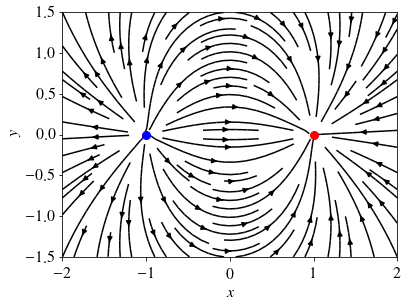

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

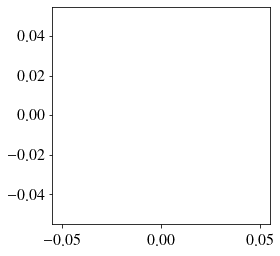

In [1]:
#!/usr/bin/env python
 
# import useful modules
import matplotlib 
from numpy import *
from pylab import *
from scipy.integrate import ode
 
# use LaTeX, choose nice some looking fonts and tweak some settings
matplotlib.rc('font', family='serif')
matplotlib.rc('font', size=16)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('legend', handlelength=1.5)
matplotlib.rc('legend', frameon=False)
matplotlib.rc('xtick.major', pad=7)
matplotlib.rc('xtick.minor', pad=7)
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', 
              preamble=[r'\usepackage[T1]{fontenc}',
                        r'\usepackage{amsmath}',
                        r'\usepackage{txfonts}',
                        r'\usepackage{textcomp}'])
 
class charge:
    def __init__(self, q, pos):
        self.q=q
        self.pos=pos
 
def E_point_charge(q, a, x, y):
    return q*(x-a[0])/((x-a[0])**2+(y-a[1])**2)**(1.5), \
        q*(y-a[1])/((x-a[0])**2+(y-a[1])**2)**(1.5)
 
def E_total(x, y, charges):
    Ex, Ey=0, 0
    for C in charges:
        E=E_point_charge(C.q, C.pos, x, y)
        Ex=Ex+E[0]
        Ey=Ey+E[1]
    return [ Ex, Ey ]
 
close('all')
figure(figsize=(6, 4.5))
 
# charges and positions
charges=[ charge(1, [-1, 0]), charge(-1, [1, 0]) ]
 
# plot field lines
x0, x1=-2, 2
y0, y1=-1.5, 1.5
x=linspace(x0, x1, 64)
y=linspace(y0, y1, 64)
x, y=meshgrid(x, y)
Ex, Ey=E_total(x, y, charges)
streamplot(x, y, Ex, Ey, color='k')
 
# plot point charges
for C in charges:
    if C.q>0:
        plot(C.pos[0], C.pos[1], 'bo', ms=8*sqrt(C.q))
    if C.q<0:
        plot(C.pos[0], C.pos[1], 'ro', ms=8*sqrt(-C.q))
 
xlabel('$x$')
ylabel('$y$')
gca().set_xlim(x0, x1)
gca().set_ylim(y0, y1)
show()
axis('image')

Streamlines of an electric dipole visualized using Matplotlib’s streamplot function.

# 1st 
Matplotlib’s streamplot function is very generic and easy to use. However it does not know anything about specific characteristics of the vector field to plot. For example, it is not able to take into account that streamlines of electric fields always start and end at the charges. Therefore, the following code plots streamlines by solving the streamlines’ ordinary differential equations. We always start close in the vicinity of the electric charges and extend each streamline until it has reached another charge or has left the plotting area.

/tmp/ipykernel_10779/519521673.py:19: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rc('text.latex',


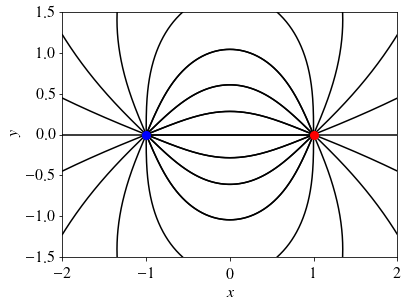

In [2]:
#!/usr/bin/env python
 
# import usefull modules
import matplotlib 
from numpy import *
from pylab import *
from scipy.integrate import ode
 
# use LaTeX, choose nice some looking fonts and tweak some settings
matplotlib.rc('font', family='serif')
matplotlib.rc('font', size=16)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('legend', handlelength=1.5)
matplotlib.rc('legend', frameon=False)
matplotlib.rc('xtick.major', pad=7)
matplotlib.rc('xtick.minor', pad=7)
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', 
              preamble=[r'\usepackage[T1]{fontenc}',
                        r'\usepackage{amsmath}',
                        r'\usepackage{txfonts}',
                        r'\usepackage{textcomp}'])
 
class charge:
    def __init__(self, q, pos):
        self.q=q
        self.pos=pos
 
def E_point_charge(q, a, x, y):
    return q*(x-a[0])/((x-a[0])**2+(y-a[1])**2)**(1.5), \
        q*(y-a[1])/((x-a[0])**2+(y-a[1])**2)**(1.5)
 
def E_total(x, y, charges):
    Ex, Ey=0, 0
    for C in charges:
        E=E_point_charge(C.q, C.pos, x, y)
        Ex=Ex+E[0]
        Ey=Ey+E[1]
    return [ Ex, Ey ]
 
def E_dir(t, y, charges):
    Ex, Ey=E_total(y[0], y[1], charges)
    n=sqrt(Ex**2+Ey*Ey)
    return [Ex/n, Ey/n]
 
close('all')
figure(figsize=(6, 4.5))
 
# charges and positions
charges=[ charge(1, [-1, 0]), charge(-1, [1, 0]) ]
 
# plot field lines
x0, x1=-2, 2
y0, y1=-1.5, 1.5
R=0.01
# loop over all charges
for C in charges:
    # plot field lines starting in current charge
    dt=0.8*R
    if C.q<0:
        dt=-dt
    # loop over field lines starting in different directions 
    # around current charge
    for alpha in linspace(0, 2*pi*15/16, 16):
        r=ode(E_dir)
        r.set_integrator('vode')
        r.set_f_params(charges)
        x=[ C.pos[0] + cos(alpha)*R ]
        y=[ C.pos[1] + sin(alpha)*R ]
        r.set_initial_value([x[0], y[0]], 0)
        while r.successful():
            r.integrate(r.t+dt)
            x.append(r.y[0])
            y.append(r.y[1])
            hit_charge=False
            # check if field line left drwaing area or ends in some charge
            for C2 in charges:
                if sqrt((r.y[0]-C2.pos[0])**2+(r.y[1]-C2.pos[1])**2)<R:
                    hit_charge=True
            if hit_charge or (not (x0<r.y[0] and r.y[0]<x1)) or \
                    (not (y0<r.y[1] and r.y[1]<y1)):
                break
        plot(x, y, '-k')
 
# plot point charges
for C in charges:
    if C.q>0:
        plot(C.pos[0], C.pos[1], 'bo', ms=8*sqrt(C.q))
    if C.q<0:
        plot(C.pos[0], C.pos[1], 'ro', ms=8*sqrt(-C.q))
 
xlabel('$x$')
ylabel('$y$')
gca().set_xlim(x0, x1)
gca().set_ylim(y0, y1)
show()

Streamlines of an electric dipole visualized by solving the streamlines’ differential equations.